### 使用numpy & pytorch实现梯度下降法

梯度下降步骤：
    
    1.设定初始值
    2.求取梯度
    3.在梯度方向上进行参数的更新

#### 1.使用numpy实现梯度下降法 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import style

In [2]:
#创建数据
n = 80
x1 = np.linspace(-8,10,n)  #np.linspace:选取均匀分布的数据
x2 = np.linspace(-10,15,n)

x = np.concatenate(([x1],[x2]),axis=0).T
w = np.array([2,-4])
y = np.dot(x,w)

In [3]:
x

array([[ -8.        , -10.        ],
       [ -7.7721519 ,  -9.6835443 ],
       [ -7.5443038 ,  -9.36708861],
       [ -7.3164557 ,  -9.05063291],
       [ -7.08860759,  -8.73417722],
       [ -6.86075949,  -8.41772152],
       [ -6.63291139,  -8.10126582],
       [ -6.40506329,  -7.78481013],
       [ -6.17721519,  -7.46835443],
       [ -5.94936709,  -7.15189873],
       [ -5.72151899,  -6.83544304],
       [ -5.49367089,  -6.51898734],
       [ -5.26582278,  -6.20253165],
       [ -5.03797468,  -5.88607595],
       [ -4.81012658,  -5.56962025],
       [ -4.58227848,  -5.25316456],
       [ -4.35443038,  -4.93670886],
       [ -4.12658228,  -4.62025316],
       [ -3.89873418,  -4.30379747],
       [ -3.67088608,  -3.98734177],
       [ -3.44303797,  -3.67088608],
       [ -3.21518987,  -3.35443038],
       [ -2.98734177,  -3.03797468],
       [ -2.75949367,  -2.72151899],
       [ -2.53164557,  -2.40506329],
       [ -2.30379747,  -2.08860759],
       [ -2.07594937,  -1.7721519 ],
 

Text(0.5, 0, 'y')

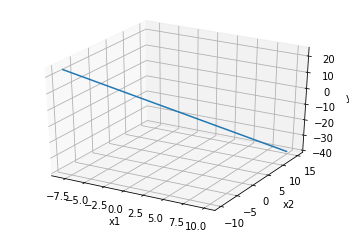

In [4]:
fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')

ax1.plot_wireframe(np.array([x1]), np.array([x2]), np.array([y]), 
                   rstride=10, cstride=5)   # rstride：行步长。  cstride：列步长
ax1.set_xlabel("x1")
ax1.set_ylabel("x2")
ax1.set_zlabel("y")

In [5]:
#梯度下降
epochs = 50 #总迭代次数
lr = 0.01 #学习率

w = np.zeros(2) #初始权重值

cost = [] #存储梯度下降中的loss值
w_all = [] #存储梯度下降中的w值
for i in range(epochs):
    w_all.append(w.copy())
    y_pred = np.dot(x,w) #使用当前权重值预测y
    loss = np.mean((y_pred-y)**2)  #均方差
    cost.append(loss)
    grd = np.mean(2*(y_pred-y)*x.T,axis=1) #计算梯度
    w -= lr*grd #更新权重值
print("最终的loss:",loss)
print("w1:",w[0]," w2:",w[1])

最终的loss: 2.7787145249635565
w1: -0.18282669031661428  w2: -2.491721678054946


Text(0.5, 0, 'loss')

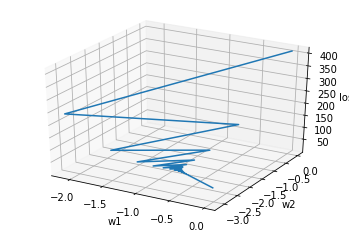

In [6]:
#画图梯度下降曲线
w_all = np.array(w_all)

fig = plt.figure()
ax1 = fig.add_subplot(111,projection='3d')
ax1.plot_wireframe(np.array([w_all[:,0]]), np.array([w_all[:,1]]), np.array([cost]))
ax1.set_xlabel("w1")
ax1.set_ylabel("w2")
ax1.set_zlabel("loss")

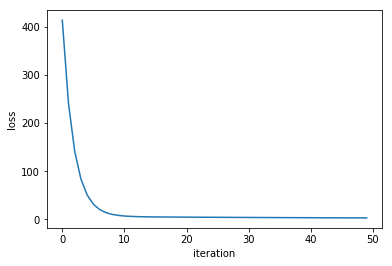

In [7]:
#画出迭代次数和loss关系曲线
fig = plt.figure()
plt.plot(cost)
plt.xlabel("iteration")
plt.ylabel("loss")
plt.show()

#### pytorch版本

In [8]:
import torch as t
from torch.autograd import Variable
import numpy as np

In [9]:
n = 100
x  = Variable(t.randn(n,2))   
#autograd.Variable 包装了张量, 并且支持几乎所有的操作. 一旦你完成了你的计算, 你就可以调用 .backward() 方法, 然后所有的梯度计算会自动进行.
w = Variable(t.FloatTensor([2,-4]))
y = w*x

In [10]:
epoch=50
lr = 0.01
w = Variable(t.FloatTensor([0,0]),requires_grad=True)

cost = []
w_all = []
for i in range(epoch):
    w_all.append(w.data)
    y_pred = w*x
    loss = t.mean((y_pred-y)**2)
    cost.append(loss.item())
    loss.backward()
    #参数更新
    w.data -= lr*w.grad.data
    w.grad.data.zero_()  #梯度归零

print("最终的loss:",loss)
print("w",w)

最终的loss: tensor(3.7050, grad_fn=<MeanBackward0>)
w tensor([ 0.8059, -1.4218], requires_grad=True)


### pytorch构建简单的神经网络
手写数字

In [15]:
#数据预处理
from torchvision import transforms

_tran = transforms.Compose([
    transforms.ToTensor(),  #将原始数据转换为张量
    #torchvision.transforms.ToTensor：把一个取值范围是[0,255]的PIL.Image或者shape为(H,W,C)的numpy.ndarray，转换成形状为[C,H,W]，取值范围是[0,1.0]的torch.FloadTensor
    #transforms.Normalize([0.5,0.5,0.5],[0.5,0.5,0.5])  
    #给定均值：(R,G,B) 方差：（R，G，B），将会把Tensor正则化。即：Normalized_image=(image-mean)/std 
    #ransforms.Normalize(mean,std)
    #ToTensor 已经把数值归一化为0-1之间，故均值为0.5
    transforms.Normalize([0.5], [0.5])
])

from torchvision.datasets import MNIST
#加载数据集
mnist = MNIST("data",download=True, train=True, transform=_tran)
                                                     #train=False可加载测试集，但此处使用训练集，方便下面练习切分数据集

In [16]:
from torch.utils.data import DataLoader
#DataLoader为多个处理器之间并行地批处理、加载和搬移数据提供了可能
from torch.utils.data.sampler import SubsetRandomSampler #样本元素从指定的索引列表中随机抽取，没有替换

#把训练集按2:8切分为训练集和测试集
split = int(0.8*len(mnist))
index_list = list(range(len(mnist)))
train_idx,test_idx = index_list[:split], index_list[split:]

trainloader = DataLoader(mnist,batch_size=256,sampler=SubsetRandomSampler(train_idx))
testloader = DataLoader(mnist,batch_size=256,sampler=SubsetRandomSampler(test_idx))
#batch_size:每个批次加载多少个样本
#sampler: 定义从数据集中提取样本的策略     #此处为从指定的索引列表中随机抽取

In [19]:
import torch.nn.functional as F
import torch.nn as nn

class Model(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 128) #每张图大小为28*28个节点
        self.output = nn.Linear(128, 10)
    def forward(self, x):
        x = x.view(x.shape[0],784)
        x = F.relu(self.hidden(x))
        x = F.softmax(self.output(x),dim=1) #dim=1 跨列求softmax
        return x
    
model = Model()

In [20]:
#定义损失函数和优化器
from torch import optim

loss_func = nn.CrossEntropyLoss() #交叉熵损失函数
optimizer = optim.SGD(model.parameters(), lr=0.01, weight_decay = 1e-5, momentum=0.9, nesterov=True)
#lr:学习率 weight_decay:权重衰减，L2惩罚    momentum:冲量，动量因子，相当于考虑惯性的力量     nesterov:是否使用动量

#SGD 把数据分批放入nn进行训练，节省资源、加速了计算过程，且损失了较少的准确率

In [21]:
# 开始训练模型
for epoch in range(1,11):
    train_loss, test_loss = [], []
    #训练数据
    model.train()
    for data,y in trainloader: #按批次训练
        optimizer.zero_grad()
        #向前传播训练
        output = model(data)
        loss = loss_func(output,y)
        #向后传播求导(梯度) 更新参数
        loss.backward()
        optimizer.step() #使用优化器更新权重
        train_loss.append(loss.item())
        
    #模型评价
    model.eval()
    for data,y in testloader:
        output = model(data)
        loss = loss_func(output,y)
        test_loss.append(loss.item())
    print("epoch:",epoch,"train loss:",np.mean(train_loss),"test loss:",np.mean(test_loss))

epoch: 1 train loss: 2.057248096516792 test loss: 1.7860862574678786
epoch: 2 train loss: 1.7558750827261742 test loss: 1.7235914215128472
epoch: 3 train loss: 1.6976579795492457 test loss: 1.6598339841720906
epoch: 4 train loss: 1.6641569340482671 test loss: 1.6451306875715865
epoch: 5 train loss: 1.652661991246203 test loss: 1.6379543745771368
epoch: 6 train loss: 1.6462060631589686 test loss: 1.63341730959872
epoch: 7 train loss: 1.6415378204051485 test loss: 1.6297617643437488
epoch: 8 train loss: 1.638036087472388 test loss: 1.6279332815332617
epoch: 9 train loss: 1.6352118627822145 test loss: 1.6247734161133462
epoch: 10 train loss: 1.6324696870560342 test loss: 1.6231469042757725


预测 

In [22]:
#在验证集上进行预测
dataiter = iter(testloader)  #iter迭代器

data,test_y = dataiter.next()
print(data.shape)
print(type(data))

#256个数字

torch.Size([256, 1, 28, 28])
<class 'torch.Tensor'>


tensor(7)


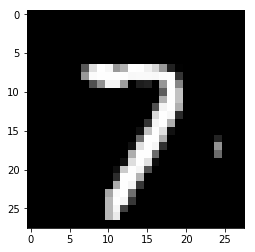

In [24]:
#举例
import matplotlib.pyplot as plt
plt.imshow(data[19].numpy().squeeze(),cmap='Greys_r')
print(test_y[19])

In [25]:
#在验证集上进行预测

output = model(data)
_,y_pred = t.max(output,1) 
#t.max(a,0):返回每一列的最大值 以及对应的索引； t.max(a,1):返回每一行的最大值 以及对应的索引

preds = np.squeeze(y_pred.numpy())
print("actual:", test_y[:10])
print("predicted:",preds[:10])

actual: tensor([3, 9, 4, 7, 8, 7, 6, 3, 1, 6])
predicted: [3 4 4 7 8 7 6 3 1 4]


tensor(9)
4


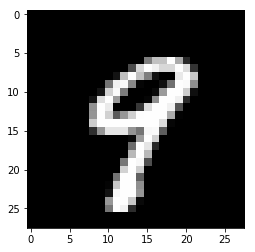

In [28]:
#举例
import matplotlib.pyplot as plt
plt.imshow(data[1].numpy().squeeze(),cmap='Greys_r')
print(test_y[1])
print(preds[1])

  附：
  
    torch.max()[0]， 只返回最大值的每个数
    troch.max()[1]， 只返回最大值的每个索引
    torch.max()[1].data 只返回variable中的数据部分（去掉Variable containing:）
    torch.max()[1].data.numpy() 把数据转化成numpy ndarry
    torch.max()[1].data.numpy().squeeze() 把数据条目中维度为1 的删除掉